# Statistical Machine Learning

- **K-Nearest Neighbors**
    - A Small Example: Predicting Loan Default
    - Distance Metrics
    - One Hot Encoder
    - Standardization (Normalization, z-Scores)
    - Choosing K
    - KNN as a Feature Engine
- **Tree Models**
    - A Simple Example
    - The Recursive Partitioning Algorithm
    - Measuring Homogeneity or Impurity
    - Stopping the Tree from Growing
    - Predicting a Continuous Value
    - How Trees Are Used
    - Further Reading
- **Bagging and the Random Forest**
    - Bagging
    - Random Forest
    - Variable Importance
    - Hyperparameters
- **Boosting**
    - The Boosting Algorithm              
    - XGBoost
    - Regularization: Avoiding Overfitting
    - Hyperparameters and Cross-Validation

### Machine Learning Versus Statistics

Machine learning tends to be focused
more on developing efficient algorithms that scale to large data in
order to optimize the predictive model. Statistics generally pays
more attention to the probabilistic theory and underlying structure
of the model. 

Bagging, and the random forest, grew up firmly in the statistics
camp. Boosting, on the other hand, has been developed in both disciplines but receives more attention on the machine learning side of the divide. Regardless of the history, the promise of boosting ensures that it will thrive as a technique in both statistics and machine learning.

## K-Nearest Neighbors

The idea behind K-Nearest Neighbors (KNN) is very simple. For each record to be classified or predicted:
1. Find K records that have similar features (i.e., similar predictor values).
2. For classification, find out what the majority class is among those similar records and assign that class to the new record.
3. For prediction (also called KNN regression), find the average among those similar records, and predict that average for the new record.

Important key terms:
**Neigbor**
**Distance metrics**
**Standardization**
**z-score**
**K**

The prediction results depend on how the features are scaled, how similarity is measured, and how big K is set. Also, all predictors must be in numeric form. We will illustrate how to use the KNN method with a classification example.

In [2]:
import math
import os
import random
from pathlib import Path
from collections import defaultdict
from itertools import product


import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

In [3]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [4]:
LOAN200_CSV = DATA / 'loan200.csv'
LOAN3000_CSV = DATA / 'loan3000.csv'
LOAN_DATA_CSV = DATA / 'loan_data.csv.gz'

### A Small Example: Predicting Loan Default

In [5]:
loan200 = pd.read_csv(LOAN200_CSV)
 
predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'


newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
knn.predict(newloan)
print(knn.predict_proba(newloan))

[[0.45 0.55]]


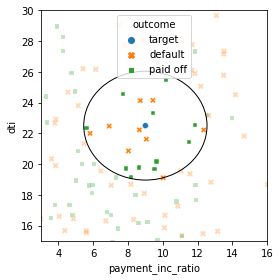

In [6]:
nbrs = knn.kneighbors(newloan)
maxDistance = np.max(nbrs[0][0])

fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', data=loan200, alpha=0.3, ax=ax)
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', 
                data=pd.concat([loan200.loc[0:0, :], loan200.loc[nbrs[1][0] + 1,:]]), 
                ax=ax, legend=False)
ellipse = Ellipse(xy=newloan.values[0], 
                  width=2 * maxDistance, height=2 * maxDistance,
                  edgecolor='black', fc='None', lw=1)
ax.add_patch(ellipse)
ax.set_xlim(3, 16)
ax.set_ylim(15, 30)

plt.tight_layout()
plt.show()